# Домашнее задание 3. Протеомика

В этом задании будет реализован полный цикл работы с протеомными данными для исследования ответа разных линий глиобластом на IFNα и IFNβ

In [2]:
from os import listdir, path
from pyteomics import fasta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import time

In [3]:
fastafile = '/projects/mipt_dbmp_biotechnology/proteomics/sp_human_canonical_2023-09-06_shuffled.fasta'

In [4]:
! ls /projects/mipt_dbmp_biotechnology/proteomics/

closed_fragger.params  raw
fragger_scavager       sample_file.csv
hw		       sp_human_canonical_2023-09-06_shuffled.fasta
msfragger.sh	       sp_human_canonical_2023-09-06_shuffled.fasta.1.pepindex
mzML		       sp_human_canonical_2023-09-06_shuffled.fasta.2.pepindex
qreps


In [5]:
! ls /projects/mipt_dbmp_biotechnology/proteomics/hw

LUM2_00790_VG_6138K_1.raw  LUM2_00809_VG_6138A_4.raw  LUM2_00838_VG_4114K_4.raw
LUM2_00791_VG_6138K_2.raw  LUM2_00817_VG_4114B_1.raw  LUM2_00839_VG_4114K_5.raw
LUM2_00792_VG_6138K_3.raw  LUM2_00818_VG_4114B_2.raw  LUM2_00840_VG_4114K_6.raw
LUM2_00793_VG_6138K_4.raw  LUM2_00819_VG_4114B_3.raw  LUM2_00841_VG_4114K_7.raw
LUM2_00798_VG_6138B_1.raw  LUM2_00820_VG_4114B_4.raw  LUM2_00853_VG_4114A_1.raw
LUM2_00799_VG_6138B_2.raw  LUM2_00821_VG_4114B_5.raw  LUM2_00854_VG_4114A_2.raw
LUM2_00800_VG_6138B_3.raw  LUM2_00822_VG_4114B_6.raw  LUM2_00855_VG_4114A_3.raw
LUM2_00801_VG_6138B_4.raw  LUM2_00823_VG_4114B_7.raw  LUM2_00856_VG_4114A_4.raw
LUM2_00806_VG_6138A_1.raw  LUM2_00835_VG_4114K_1.raw  LUM2_00857_VG_4114A_5.raw
LUM2_00807_VG_6138A_2.raw  LUM2_00836_VG_4114K_2.raw  LUM2_00858_VG_4114A_6.raw
LUM2_00808_VG_6138A_3.raw  LUM2_00837_VG_4114K_3.raw  LUM2_00859_VG_4114A_7.raw


In [6]:
ls /projects/mipt_dbmp_biotechnology/proteomics/raw

LUM2_00709_VG_3821K_1.raw  LUM2_00721_VG_3821B_1.raw  LUM2_00740_VG_3821A_1.raw
LUM2_00710_VG_3821K_2.raw  LUM2_00722_VG_3821B_2.raw  LUM2_00741_VG_3821A_2.raw
LUM2_00711_VG_3821K_3.raw  LUM2_00723_VG_3821B_3.raw  LUM2_00742_VG_3821A_3.raw
LUM2_00712_VG_3821K_4.raw  LUM2_00724_VG_3821B_4.raw  LUM2_00743_VG_3821A_4.raw


In [7]:
ls /projects/mipt_dbmp_biotechnology/proteomics/mzML

LUM2_00709_VG_3821K_1.mzML    LUM2_00723_VG_3821B_3.mzML
LUM2_00709_VG_3821K_1.pepXML  LUM2_00723_VG_3821B_3.pepXML
LUM2_00709_VG_3821K_1.pin     LUM2_00723_VG_3821B_3.pin
LUM2_00710_VG_3821K_2.mzML    LUM2_00724_VG_3821B_4.mzML
LUM2_00710_VG_3821K_2.pepXML  LUM2_00724_VG_3821B_4.pepXML
LUM2_00710_VG_3821K_2.pin     LUM2_00724_VG_3821B_4.pin
LUM2_00711_VG_3821K_3.mzML    LUM2_00740_VG_3821A_1.mzML
LUM2_00711_VG_3821K_3.pepXML  LUM2_00740_VG_3821A_1.pepXML
LUM2_00711_VG_3821K_3.pin     LUM2_00740_VG_3821A_1.pin
LUM2_00712_VG_3821K_4.mzML    LUM2_00741_VG_3821A_2.mzML
LUM2_00712_VG_3821K_4.pepXML  LUM2_00741_VG_3821A_2.pepXML
LUM2_00712_VG_3821K_4.pin     LUM2_00741_VG_3821A_2.pin
LUM2_00721_VG_3821B_1.mzML    LUM2_00742_VG_3821A_3.mzML
LUM2_00721_VG_3821B_1.pepXML  LUM2_00742_VG_3821A_3.pepXML
LUM2_00721_VG_3821B_1.pin     LUM2_00742_VG_3821A_3.pin
LUM2_00722_VG_3821B_2.mzML    LUM2_00743_VG_3821A_4.mzML
LUM2_00722_VG_3821B_2.pepXML  LUM2_00743_VG_3821A_4.pepXML
LUM2_00722_VG_3821B_2.pi

# Конвертация сырых спектров в mzML
Сделаю только для домашних сырых файлов, для семинарского конвертация уже проведена

In [ ]:
%%time
filedir = '/projects/mipt_dbmp_biotechnology/proteomics/hw/'
outdir = '/home/nkondratyuk/homework/hw_2.3/mzML'
for file in listdir(filedir):
    if file.endswith('.raw') and file.replace('raw', 'mzML') not in listdir(outdir):
        path_to_file = path.join(filedir, file)
        !/projects/mipt_dbmp_biotechnology/soft/ThermoRawFileParser/ThermoRawFileParser -i $path_to_file -o $outdir

=2025-11-18 12:15:48 INFO Started parsing /projects/mipt_dbmp_biotechnology/proteomics/hw/LUM2_00800_VG_6138B_3.raw
2025-11-18 12:15:51 INFO Processing 84484 MS scans
10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 

2025-11-18 12:18:09 INFO Finished parsing /projects/mipt_dbmp_biotechnology/proteomics/hw/LUM2_00800_VG_6138B_3.raw
2025-11-18 12:18:09 INFO Processing completed 0 errors, 0 warnings
=2025-11-18 12:18:10 INFO Started parsing /projects/mipt_dbmp_biotechnology/proteomics/hw/LUM2_00806_VG_6138A_1.raw
2025-11-18 12:18:17 INFO Processing 87115 MS scans
10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 

2025-11-18 12:20:34 INFO Finished parsing /projects/mipt_dbmp_biotechnology/proteomics/hw/LUM2_00806_VG_6138A_1.raw
2025-11-18 12:20:34 INFO Processing completed 0 errors, 0 warnings
=2025-11-18 12:20:34 INFO Started parsing /projects/mipt_dbmp_biotechnology/proteomics/hw/LUM2_00817_VG_4114B_1.raw
2025-11-18 12:20:43 INFO Processing 84579 MS scans
10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 

2

# Идентификация белков 

Запускаем MSFragger через slurm

запустила через `sbatch msfragger.sh`

# Пост-поисковая валидация

In [3]:
%%time
filedir = '/home/nkondratyuk/homework/hw_2.3/mzML'
outdir = '/home/nkondratyuk/homework/hw_2.3/fragger_scavager'
for file in listdir(filedir):
    filename = file.split('.')[0] 
    if file.endswith('.pepXML') and filename + '_protein_groups.tsv' not in listdir(outdir):
        print(file)
        path_to_pepxml = path.join(filedir, file)
        !scavager -p DECOY_ -db $fastafile -o $outdir $path_to_pepxml

LUM2_00840_VG_4114K_6.pepXML
     INFO: [15:33:01] 1 file(s) to process.
     INFO: [15:33:02] Loading file LUM2_00840_VG_4114K_6.pepXML...
     INFO: [15:33:13] Default target-decoy filtering, 1% PSM FDR: Number of target PSMs = 29466
     INFO: [15:33:13] Calibrating retention model...
     INFO: [15:33:32] RT model training results: R^2 = 0.853956 , std = 10.784510
     INFO: [15:33:32] Retention model calibrated successfully.
     INFO: [15:33:33] Starting machine learning...
     INFO: [15:34:54] Machine learning is finished.
     INFO: [15:34:59] Final results at 1.0% FDR level:
     INFO: [15:34:59] Identified PSMs: 30725
     INFO: [15:34:59] Identified peptides: 22308
     INFO: [15:34:59] Identified proteins: 3986
     INFO: [15:34:59] Identified protein groups: 3486
     INFO: [15:34:59] Processing finished.
     INFO: [15:35:04] Output tables saved.
     INFO: [15:35:14] Figures saved.
LUM2_00818_VG_4114B_2.pepXML
     INFO: [15:35:41] 1 file(s) to process.
     INFO: [15:3

# Количественный анализ + анализ дифференциальной экспресии

## Считаем число белков в фасте

In [4]:
i = 0
for p in fasta.read(fastafile):
    i+=1
print("Число настоящих белков в базе данных:",  i//2)

Число настоящих белков в базе данных: 20423


## Создаем sample-file

In [7]:
sample_df = pd.DataFrame(columns = ['File Name', 'SampleID'])
filedir = '/home/nkondratyuk/homework/hw_2.3/fragger_scavager'
for file in listdir(filedir):
    if file.endswith('protein_groups.tsv'):
        name = file.split('_protein_groups')[0]
        sample = file.split('VG_')[1].split('_')[0]
        tmp_dict = {'File Name': [file],
                    'SampleID':[sample]}
        sample_df = pd.concat([sample_df, pd.DataFrame.from_dict(tmp_dict)])
sample_df.to_csv('/home/nkondratyuk/homework/hw_2.3/fragger_scavager/sample_file.csv')

In [8]:
sample_df

File Name SampleID
0  LUM2_00791_VG_6138K_2_protein_groups.tsv    6138K
0  LUM2_00820_VG_4114B_4_protein_groups.tsv    4114B
0  LUM2_00806_VG_6138A_1_protein_groups.tsv    6138A
0  LUM2_00854_VG_4114A_2_protein_groups.tsv    4114A
0  LUM2_00857_VG_4114A_5_protein_groups.tsv    4114A
0  LUM2_00809_VG_6138A_4_protein_groups.tsv    6138A
0  LUM2_00836_VG_4114K_2_protein_groups.tsv    4114K
0  LUM2_00801_VG_6138B_4_protein_groups.tsv    6138B
0  LUM2_00793_VG_6138K_4_protein_groups.tsv    6138K
0  LUM2_00853_VG_4114A_1_protein_groups.tsv    4114A
0  LUM2_00835_VG_4114K_1_protein_groups.tsv    4114K
0  LUM2_00859_VG_4114A_7_protein_groups.tsv    4114A
0  LUM2_00808_VG_6138A_3_protein_groups.tsv    6138A
0  LUM2_00823_VG_4114B_7_protein_groups.tsv    4114B
0  LUM2_00821_VG_4114B_5_protein_groups.tsv    4114B
0  LUM2_00798_VG_6138B_1_protein_groups.tsv    6138B
0  LUM2_00855_VG_4114A_3_protein_groups.tsv    4114A
0  LUM2_00837_VG_4114K_3_protein_groups.tsv    4114K
0  LUM2_00799_VG_6138B_2_protein_groups.tsv    6138B
0  LUM2_00818_VG_4114B_2_protein_groups.tsv    4114B
0  LUM2_00807_VG_6138A_2_protein_groups.tsv    6138A
0  LUM2_00841_VG_4114K_7_protein_groups.tsv    4114K
0  LUM2_00822_VG_4114B_6_protein_groups.tsv    4114B
0  LUM2_00790_VG_6138K_1_protein_groups.tsv    6138K
0  LUM2_00792_VG_6138K_3_protein_groups.tsv    6138K
0  LUM2_00840_VG_4114K_6_protein_groups.tsv    4114K
0  LUM2_00856_VG_4114A_4_protein_groups.tsv    4114A
0  LUM2_00858_VG_4114A_6_protein_groups.tsv    4114A
0  LUM2_00838_VG_4114K_4_protein_groups.tsv    4114K
0  LUM2_00817_VG_4114B_1_protein_groups.tsv    4114B
0  LUM2_00819_VG_4114B_3_protein_groups.tsv    4114B
0  LUM2_00839_VG_4114K_5_protein_groups.tsv    4114K
0  LUM2_00800_VG_6138B_3_protein_groups.tsv    6138B

Теперь добавлю данные для линии с семинара:

In [14]:
my_df = pd.read_csv('/home/nkondratyuk/homework/hw_2.3/fragger_scavager/sample_file.csv', index_col=0)
shared_df = pd.read_csv('/projects/mipt_dbmp_biotechnology/proteomics/sample_file.csv', index_col=0)

print(f"Мой файл: {len(my_df)} строк")
print(f"Общий файл: {len(shared_df)} строк")
combined_df = pd.concat([my_df, shared_df], ignore_index=True)
print(f"После объединения: {len(combined_df)} строк")

combined_df.to_csv('/home/nkondratyuk/homework/hw_2.3/fragger_scavager/sample_file_combined.csv', index=False)

Мой файл: 33 строк
Общий файл: 12 строк
После объединения: 45 строк


In [15]:
combined_df

File Name SampleID
0   LUM2_00791_VG_6138K_2_protein_groups.tsv    6138K
1   LUM2_00820_VG_4114B_4_protein_groups.tsv    4114B
2   LUM2_00806_VG_6138A_1_protein_groups.tsv    6138A
3   LUM2_00854_VG_4114A_2_protein_groups.tsv    4114A
4   LUM2_00857_VG_4114A_5_protein_groups.tsv    4114A
5   LUM2_00809_VG_6138A_4_protein_groups.tsv    6138A
6   LUM2_00836_VG_4114K_2_protein_groups.tsv    4114K
7   LUM2_00801_VG_6138B_4_protein_groups.tsv    6138B
8   LUM2_00793_VG_6138K_4_protein_groups.tsv    6138K
9   LUM2_00853_VG_4114A_1_protein_groups.tsv    4114A
10  LUM2_00835_VG_4114K_1_protein_groups.tsv    4114K
11  LUM2_00859_VG_4114A_7_protein_groups.tsv    4114A
12  LUM2_00808_VG_6138A_3_protein_groups.tsv    6138A
13  LUM2_00823_VG_4114B_7_protein_groups.tsv    4114B
14  LUM2_00821_VG_4114B_5_protein_groups.tsv    4114B
15  LUM2_00798_VG_6138B_1_protein_groups.tsv    6138B
16  LUM2_00855_VG_4114A_3_protein_groups.tsv    4114A
17  LUM2_00837_VG_4114K_3_protein_groups.tsv    4114K
18  LUM2_00799_VG_6138B_2_protein_groups.tsv    6138B
19  LUM2_00818_VG_4114B_2_protein_groups.tsv    4114B
20  LUM2_00807_VG_6138A_2_protein_groups.tsv    6138A
21  LUM2_00841_VG_4114K_7_protein_groups.tsv    4114K
22  LUM2_00822_VG_4114B_6_protein_groups.tsv    4114B
23  LUM2_00790_VG_6138K_1_protein_groups.tsv    6138K
24  LUM2_00792_VG_6138K_3_protein_groups.tsv    6138K
25  LUM2_00840_VG_4114K_6_protein_groups.tsv    4114K
26  LUM2_00856_VG_4114A_4_protein_groups.tsv    4114A
27  LUM2_00858_VG_4114A_6_protein_groups.tsv    4114A
28  LUM2_00838_VG_4114K_4_protein_groups.tsv    4114K
29  LUM2_00817_VG_4114B_1_protein_groups.tsv    4114B
30  LUM2_00819_VG_4114B_3_protein_groups.tsv    4114B
31  LUM2_00839_VG_4114K_5_protein_groups.tsv    4114K
32  LUM2_00800_VG_6138B_3_protein_groups.tsv    6138B
33  LUM2_00711_VG_3821K_3_protein_groups.tsv    3821K
34  LUM2_00740_VG_3821A_1_protein_groups.tsv    3821A
35  LUM2_00743_VG_3821A_4_protein_groups.tsv    3821A
36  LUM2_00712_VG_3821K_4_protein_groups.tsv    3821K
37  LUM2_00709_VG_3821K_1_protein_groups.tsv    3821K
38  LUM2_00742_VG_3821A_3_protein_groups.tsv    3821A
39  LUM2_00721_VG_3821B_1_protein_groups.tsv    3821B
40  LUM2_00724_VG_3821B_4_protein_groups.tsv    3821B
41  LUM2_00710_VG_3821K_2_protein_groups.tsv    3821K
42  LUM2_00723_VG_3821B_3_protein_groups.tsv    3821B
43  LUM2_00722_VG_3821B_2_protein_groups.tsv    3821B
44  LUM2_00741_VG_3821A_2_protein_groups.tsv    3821A

In [16]:
combined_df['SampleID'].unique()

array(['6138K', '4114B', '6138A', '4114A', '4114K', '6138B', '3821K',
       '3821A', '3821B'], dtype=object)

In [12]:
cp /projects/mipt_dbmp_biotechnology/proteomics/fragger_scavager/* /home/nkondratyuk/homework/hw_2.3/fragger_scavager

In [7]:
filedir = '/home/nkondratyuk/homework/hw_2.3/fragger_scavager'
sample_file = '/home/nkondratyuk/homework/hw_2.3/fragger_scavager/sample_file_combined.csv'
outdir = '/home/nkondratyuk/homework/hw_2.3/qreps'

labels = '3821A,3821K 3821B,3821K 4114A,4114K 4114B,4114K 6138A,6138K 6138B,6138K'

!qreps --sample-file $sample_file --labels $labels\
    --input-dir $filedir --output-dir $outdir\
    --imputation kNN --thresholds semi-dynamic --alpha 0.01 --regulation UP\
    --fasta-size 20423 --species 9606 --report True

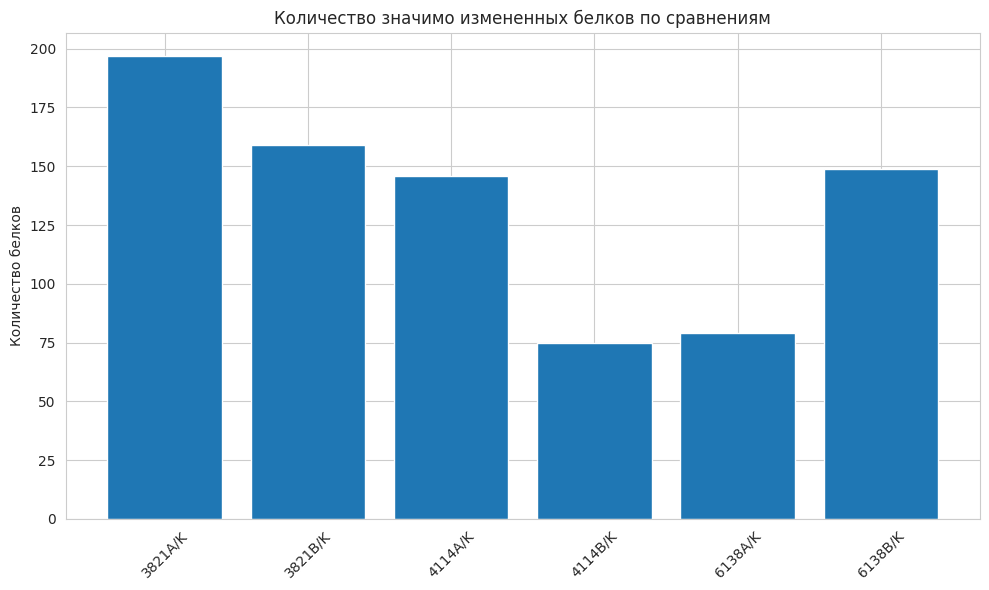

In [11]:
comparisons = ['3821A/K', '3821B/K', '4114A/K', '4114B/K', '6138A/K', '6138B/K']
significant_proteins = [197, 159, 146, 75, 79, 149] # из данных в папке qreps

plt.figure(figsize=(10, 6))
plt.bar(comparisons, significant_proteins)
plt.title('Количество значимо измененных белков по сравнениям')
plt.ylabel('Количество белков')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

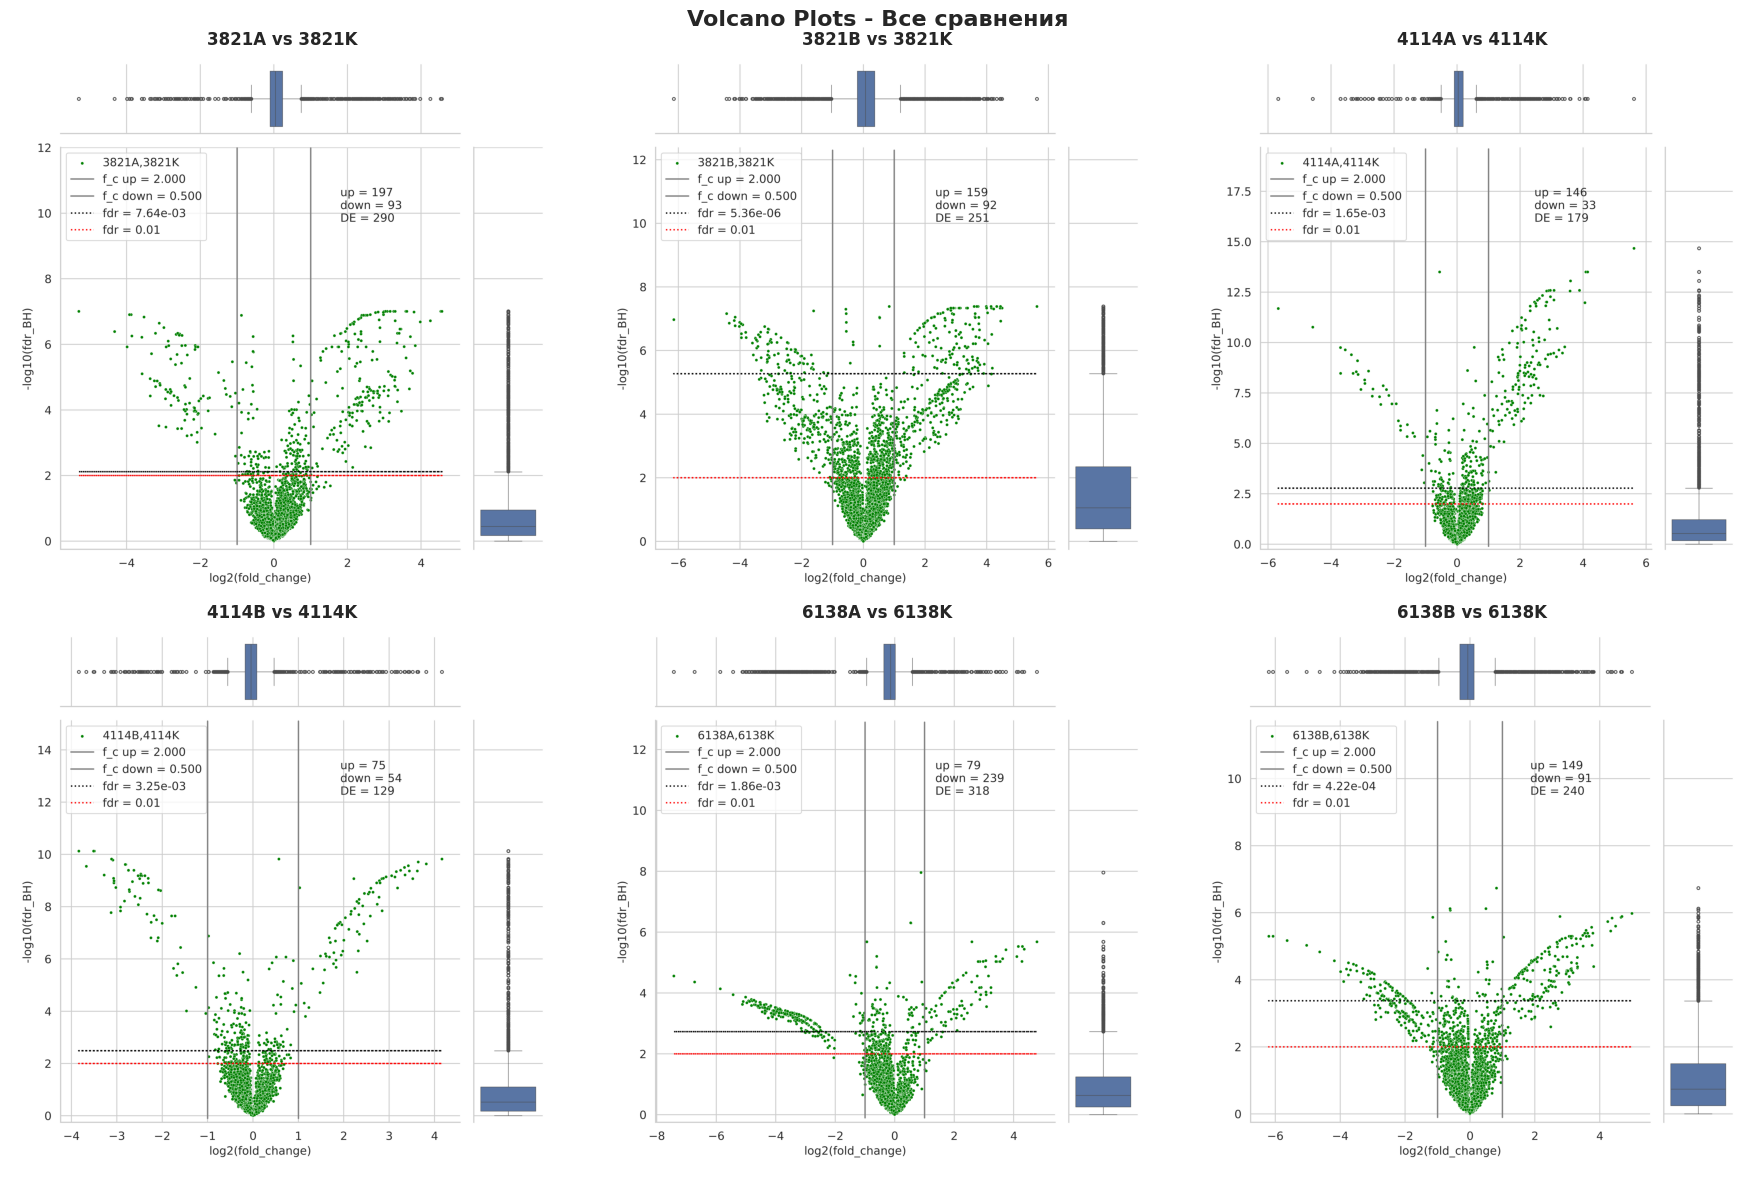

In [5]:
import matplotlib.image as mpimg
import os
outdir = '/home/nkondratyuk/homework/hw_2.3/qreps'

volcano_files = [f for f in os.listdir(outdir) if f.startswith('volcano_') and f.endswith('.png')]
volcano_files.sort()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Volcano Plots - Все сравнения', fontsize=16, fontweight='bold')

for i, volcano_file in enumerate(volcano_files):
    row = i // 3
    col = i % 3
    img = mpimg.imread(os.path.join(outdir, volcano_file))
    
    axes[row, col].imshow(img)
    axes[row, col].set_title(volcano_file.replace('volcano_', '').replace('.png', '').replace('_', ' vs '), 
                           fontsize=12, fontweight='bold')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

Визуально можем отметить точки down и up регуляции в верхних левом и правом квадрате соответственно

## Go enrichment analysis

Сайт string-db.org, списки генов в файлах DRG. 

In [14]:
outdir = '/home/nkondratyuk/homework/hw_2.3/qreps'

drg_files = [f for f in os.listdir(outdir) if f.startswith('DRG_') and f.endswith('.tsv')]
drg_files.sort()

for drg_file in drg_files:
    df = pd.read_csv(os.path.join(outdir, drg_file), sep='\t')
    comparison = drg_file.replace('DRG_', '').replace('.tsv', '')
    
    # Получаем уникальные гены
    genes = df['Gene'].dropna().unique()
    
    # Создаем DataFrame с генами
    genes_df = pd.DataFrame({'Gene': sorted(genes)})
    
    # Сохраняем в CSV
    output_file = os.path.join(outdir, f"{comparison}_genes.csv")
    genes_df.to_csv(output_file, index=False, header=False)
    
    print(f"Создан файл: {output_file}")
    print(f"Количество генов: {len(genes)}")

Создан файл: /home/nkondratyuk/homework/hw_2.3/qreps/3821A_3821K_genes.csv
Количество генов: 197
Создан файл: /home/nkondratyuk/homework/hw_2.3/qreps/3821B_3821K_genes.csv
Количество генов: 159
Создан файл: /home/nkondratyuk/homework/hw_2.3/qreps/4114A_4114K_genes.csv
Количество генов: 146
Создан файл: /home/nkondratyuk/homework/hw_2.3/qreps/4114B_4114K_genes.csv
Количество генов: 75
Создан файл: /home/nkondratyuk/homework/hw_2.3/qreps/6138A_6138K_genes.csv
Количество генов: 79
Создан файл: /home/nkondratyuk/homework/hw_2.3/qreps/6138B_6138K_genes.csv
Количество генов: 149


Получила сети, например:
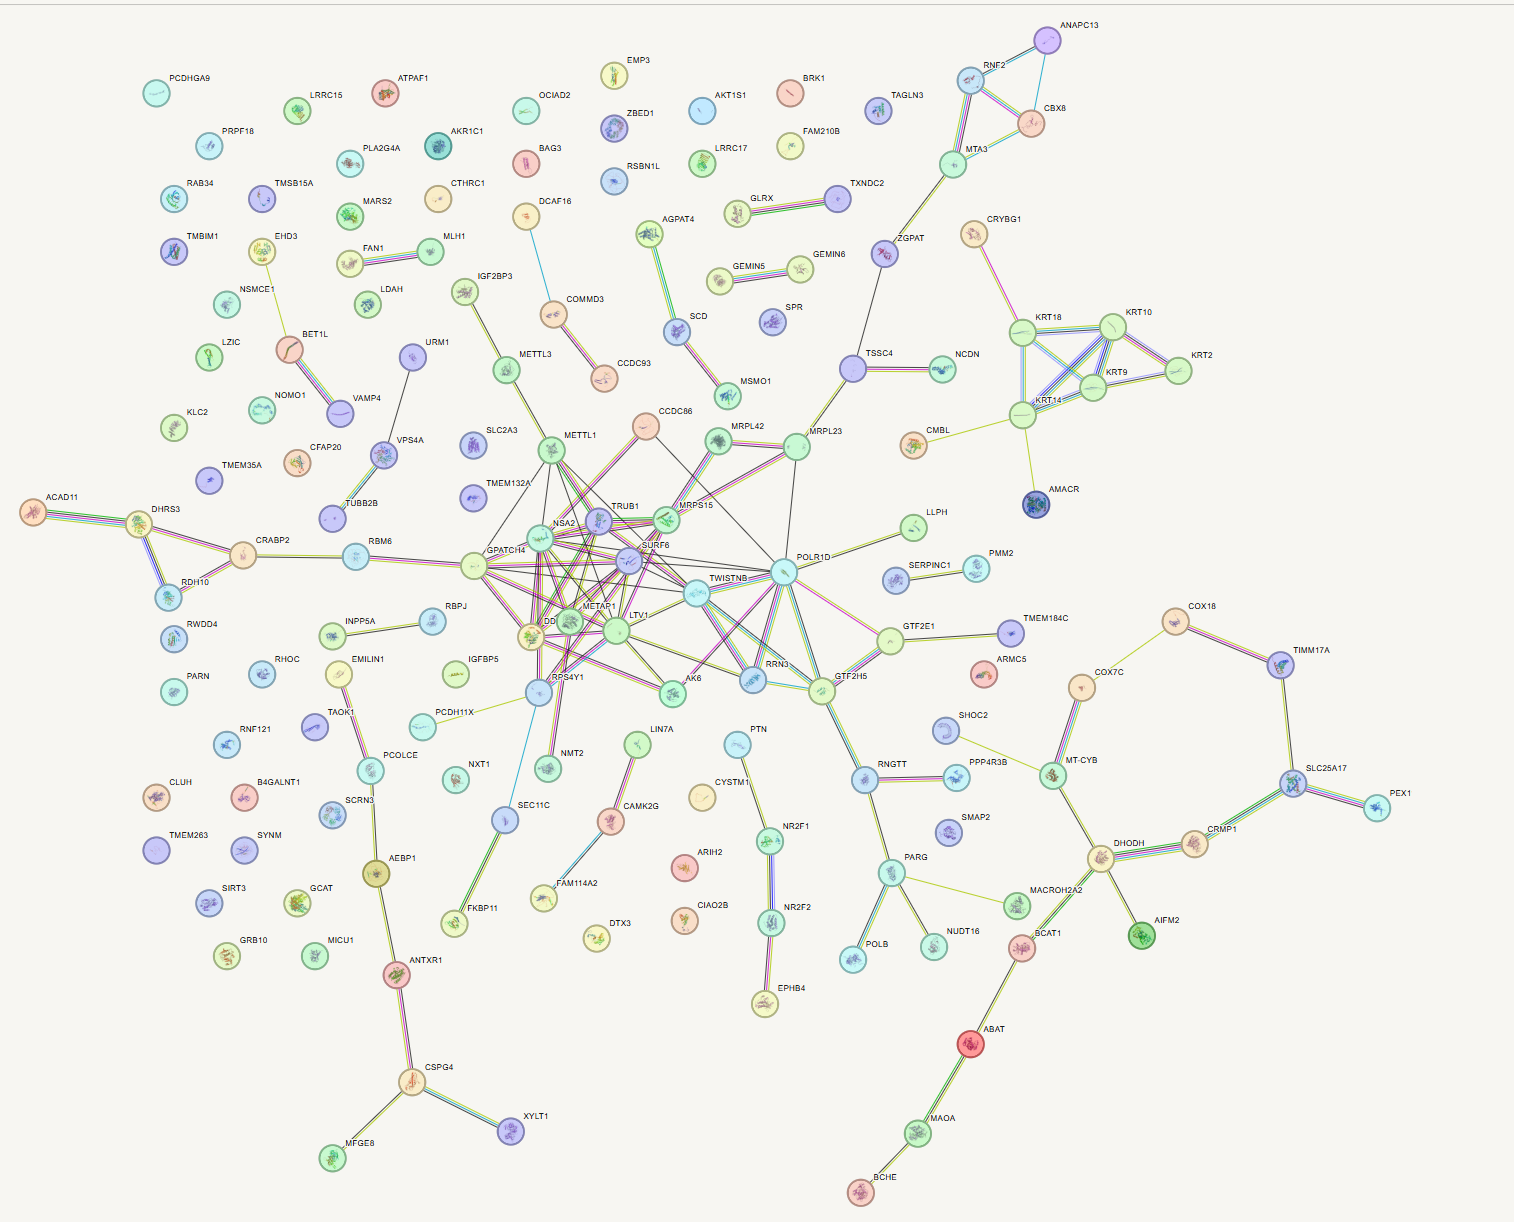

или:

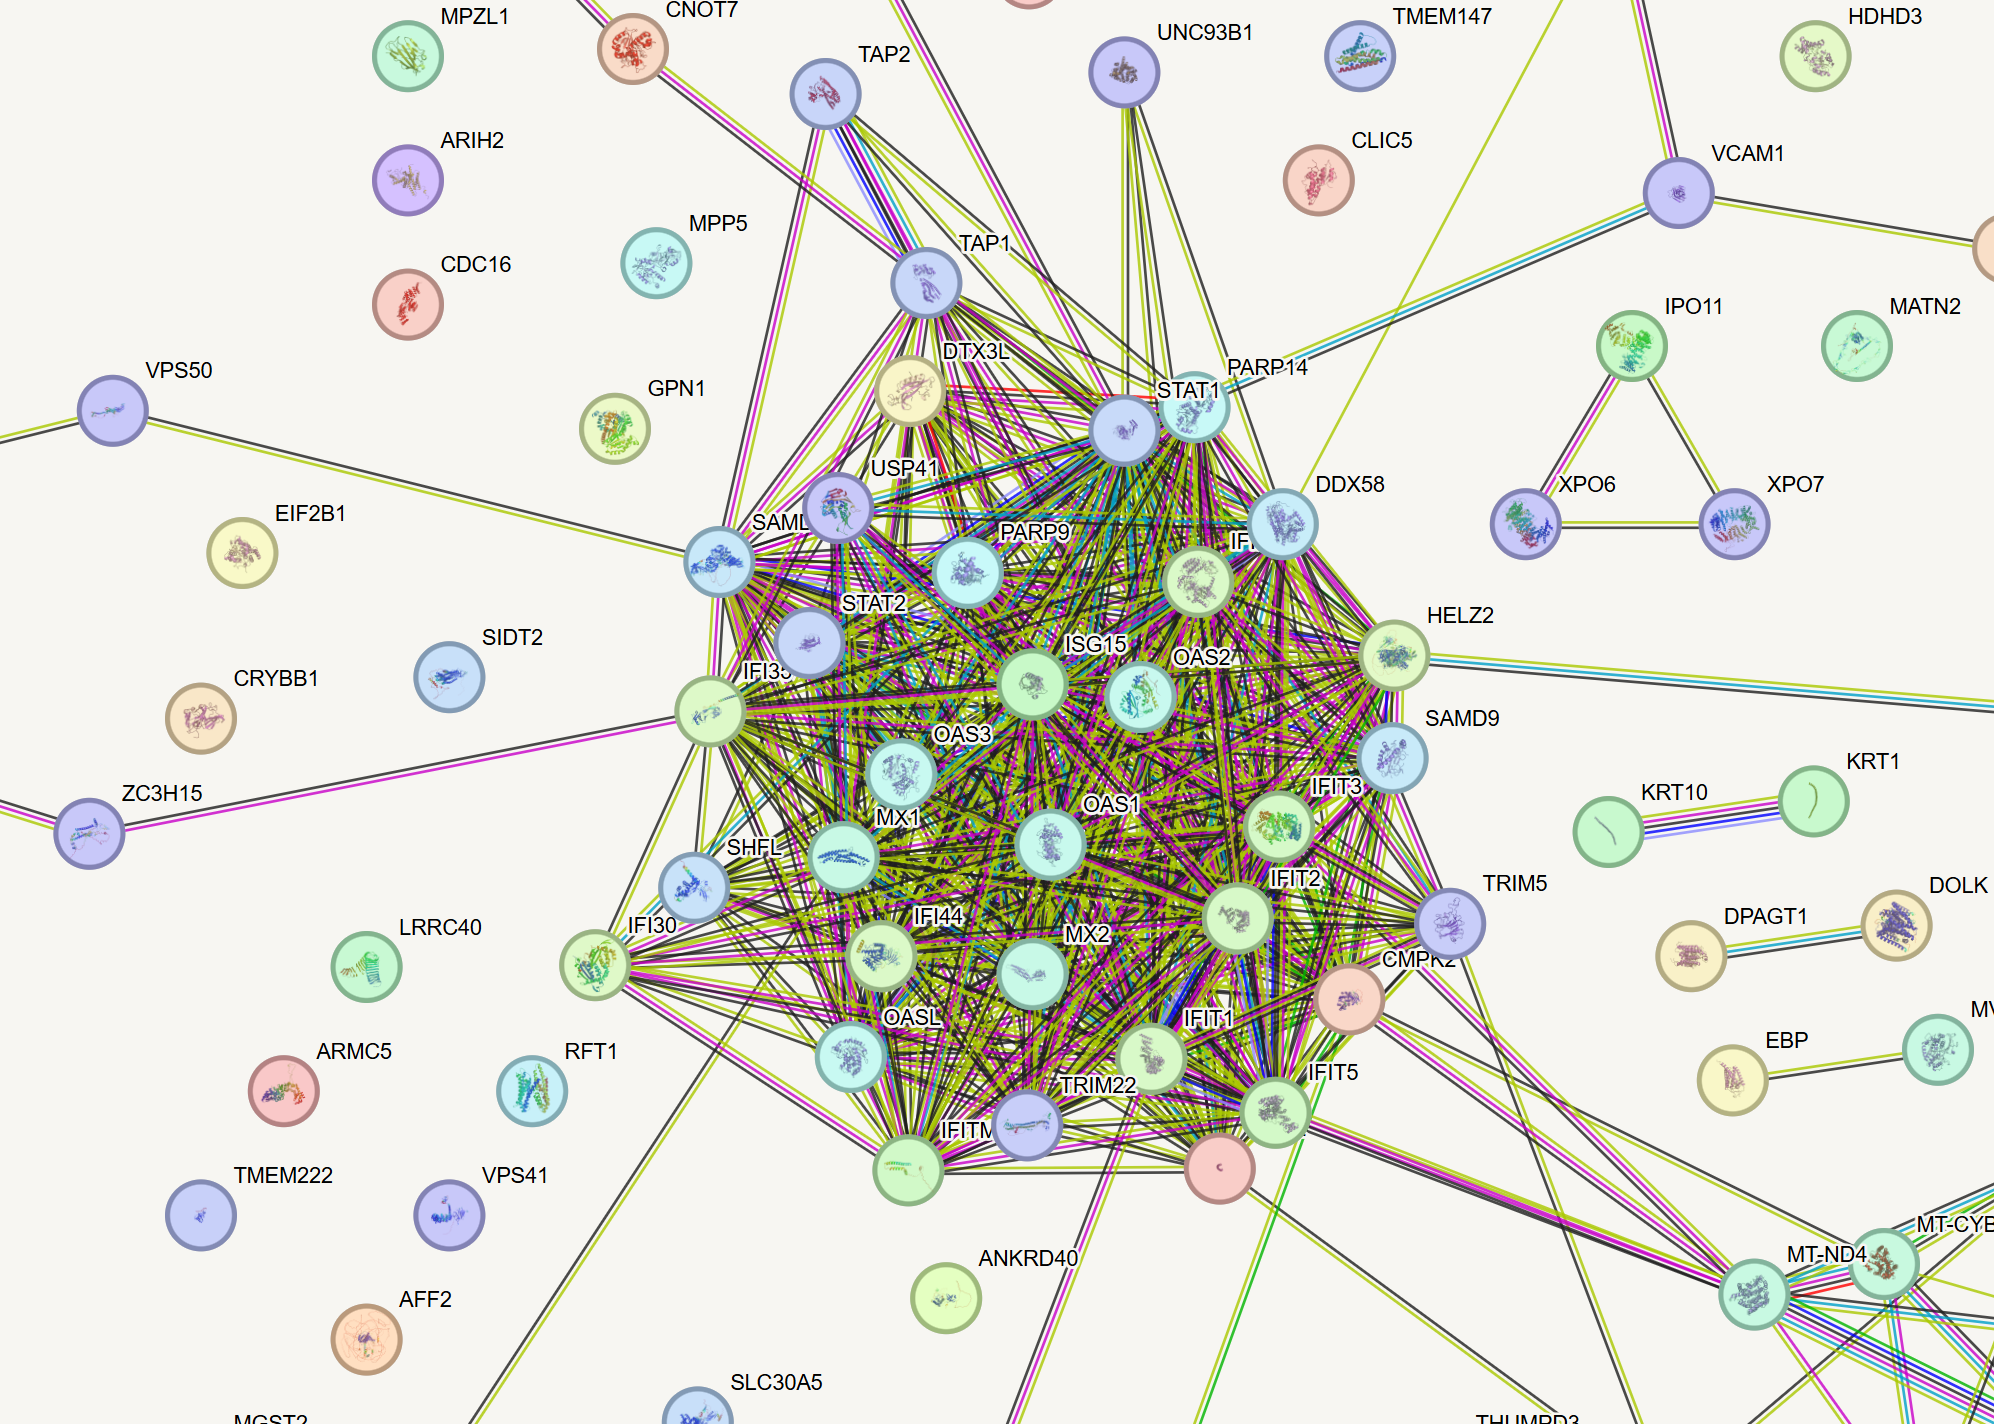

## Post enrichment

## Визуализация топ10 терминов для каждой категории

In [22]:
ls /home/nkondratyuk/homework/hw_2.3/*_genes.all.tsv

/home/nkondratyuk/homework/hw_2.3/enrichment_3821A_3821K_genes.all.tsv
/home/nkondratyuk/homework/hw_2.3/enrichment_3821B_3821K_genes.all.tsv
/home/nkondratyuk/homework/hw_2.3/enrichment_4114A_4114K_genes.all.tsv
/home/nkondratyuk/homework/hw_2.3/enrichment_4114B_4114K_genes.all.tsv
/home/nkondratyuk/homework/hw_2.3/enrichment_6138A_6138K_genes.all.tsv
/home/nkondratyuk/homework/hw_2.3/enrichment_6138B_6138K_genes.all.tsv


Это результат для семинарских данных, дальше покажу, что он совпадает с моими результатами:

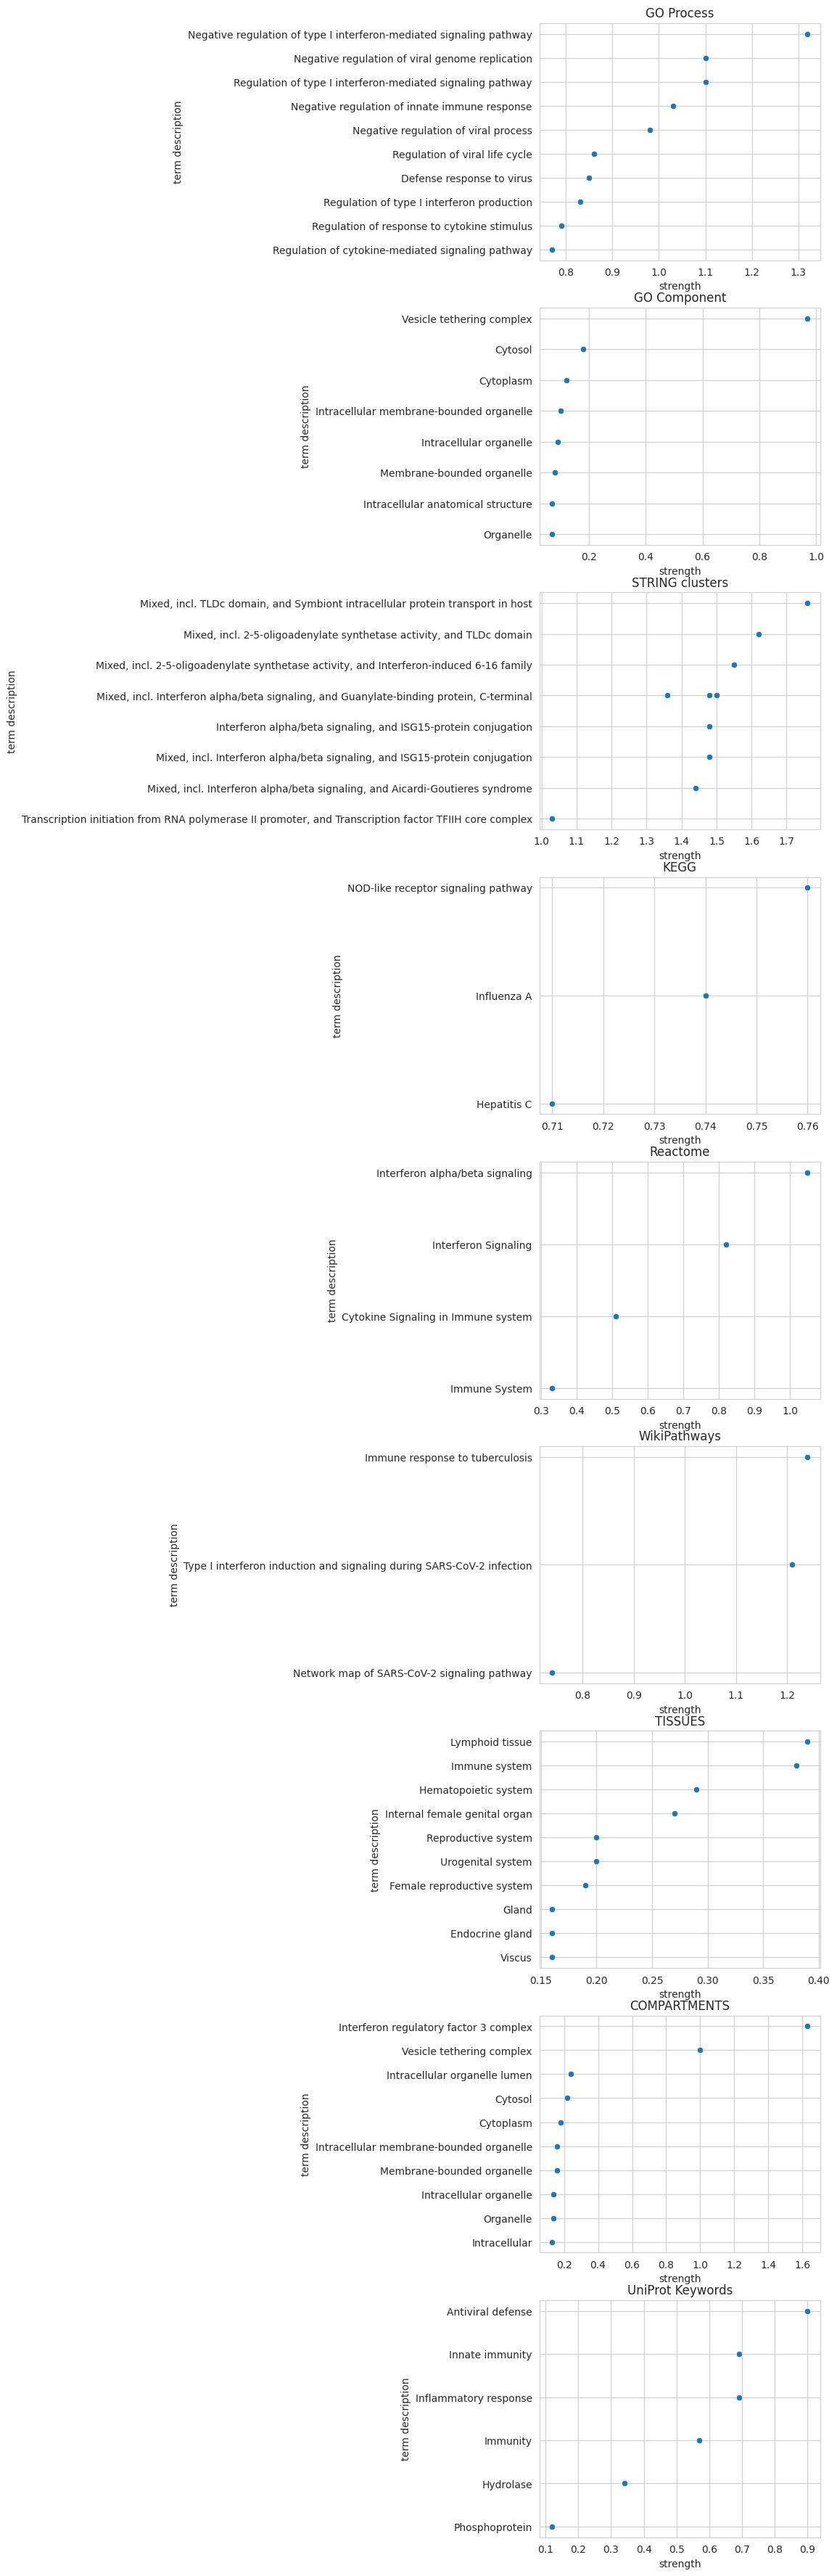

In [23]:
filedir = '/projects/mipt_dbmp_biotechnology/proteomics/qreps'
for file in listdir(filedir):
    if file.startswith('enrichment'):
        df = pd.read_csv(path.join(filedir, file), sep = '\t')
        cats = df['#category'].unique()
        f, ax = plt.subplots(len(cats), 1, figsize = (5, 45))
        i = 0
        for c in cats:
            tmp = df[df['#category'] == c]
            tmp = tmp.sort_values(by = 'strength', ascending = False)
            sns.scatterplot(x = 'strength', y = 'term description', data = tmp.head(10), ax = ax[i])
            ax[i].set_title(c)
            i+=1

Получила ровно тот же результат для 3821A_3821K_genes:

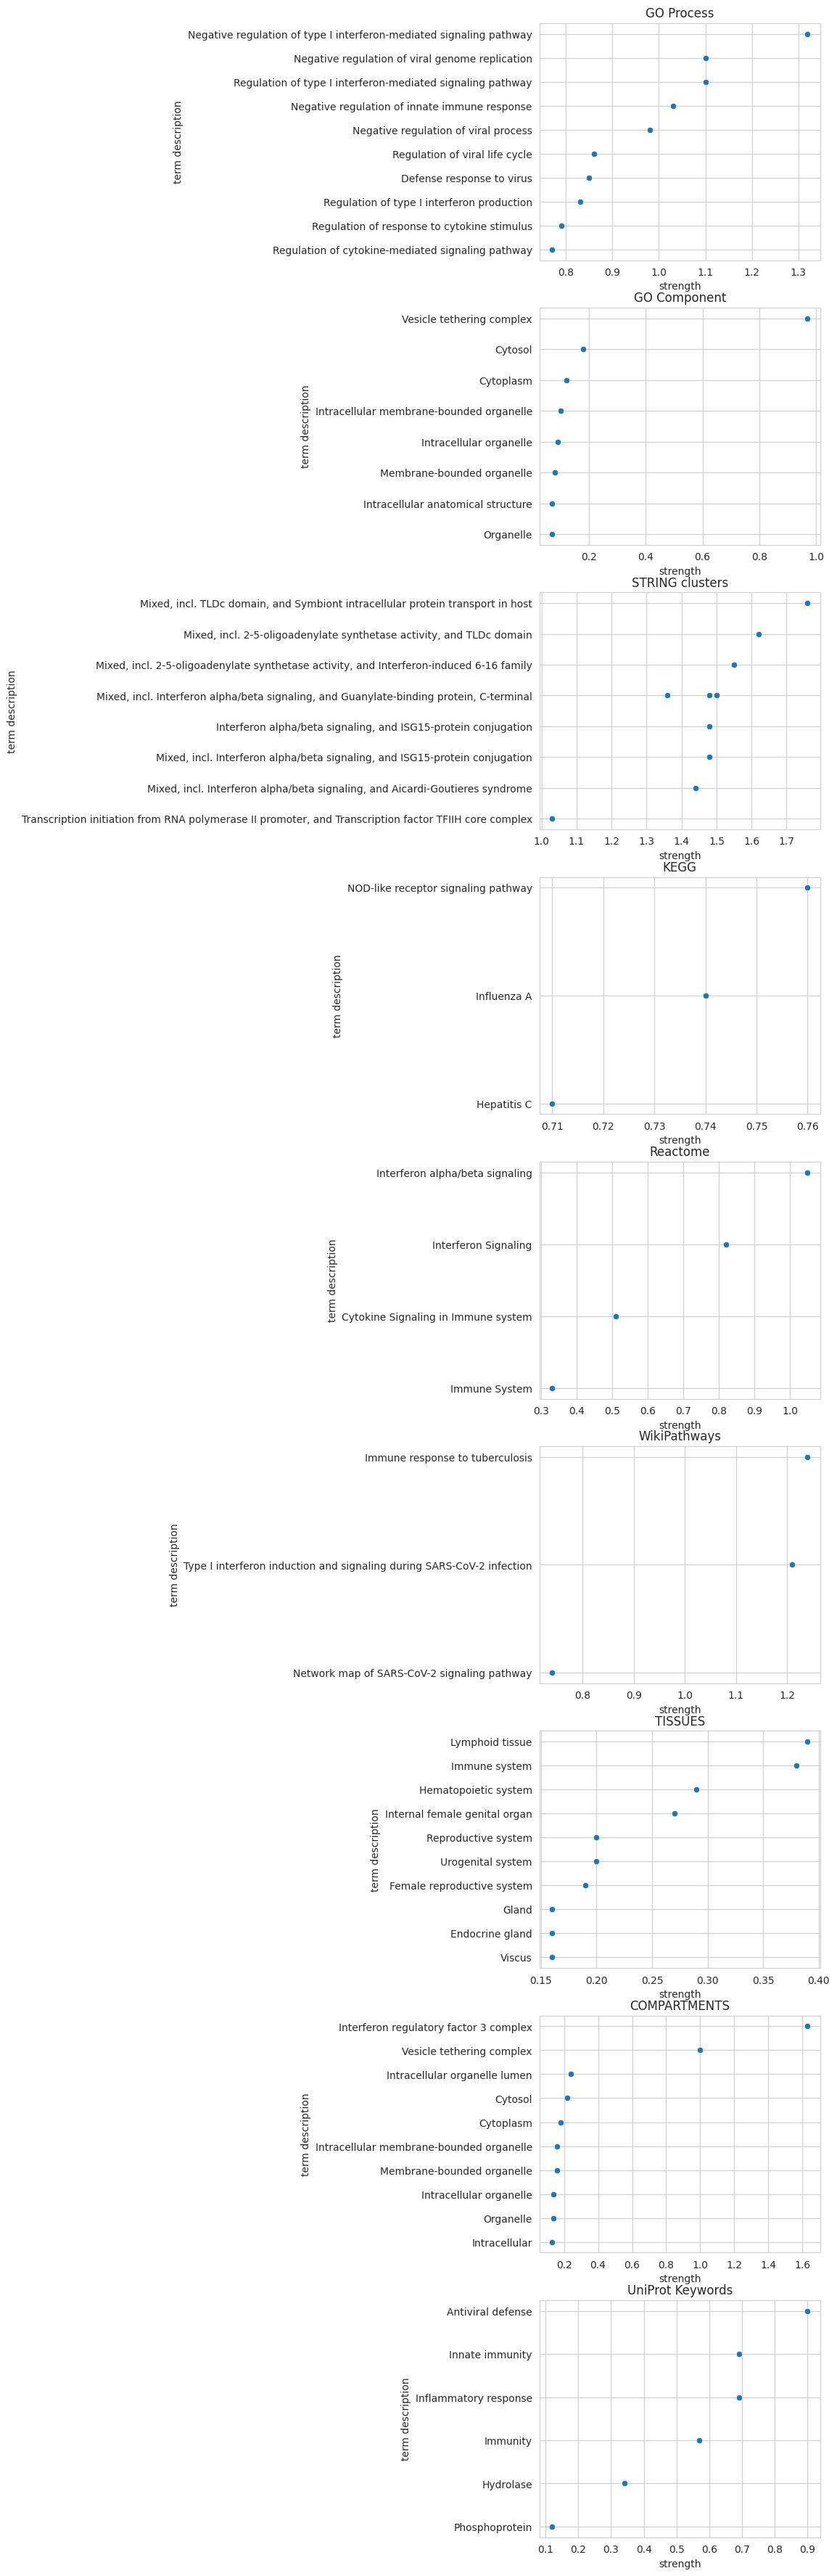

In [25]:
df = pd.read_csv('/home/nkondratyuk/homework/hw_2.3/enrichment_3821A_3821K_genes.all.tsv', sep = '\t')
cats = df['#category'].unique()
f, ax = plt.subplots(len(cats), 1, figsize = (5, 45))
i = 0
for c in cats:
    tmp = df[df['#category'] == c]
    tmp = tmp.sort_values(by = 'strength', ascending = False)
    sns.scatterplot(x = 'strength', y = 'term description', data = tmp.head(10), ax = ax[i])
    ax[i].set_title(c)
    i+=1

А теперь и для всех остальных:

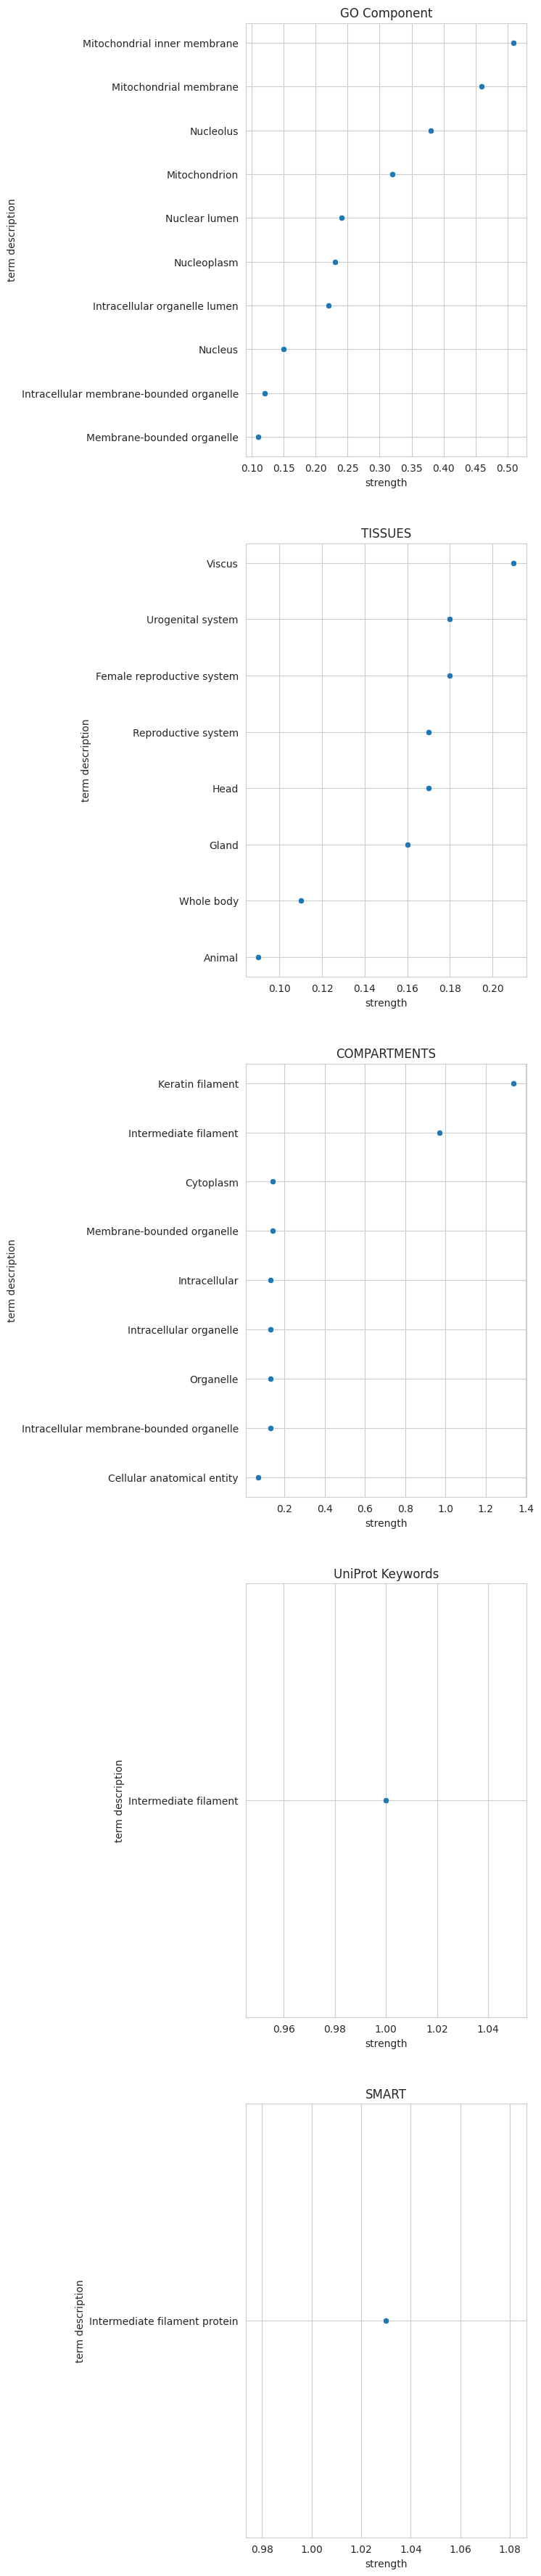

In [27]:
# 3821B_3821K
df = pd.read_csv('/home/nkondratyuk/homework/hw_2.3/enrichment_3821B_3821K_genes.all.tsv', sep = '\t')
cats = df['#category'].unique()
f, ax = plt.subplots(len(cats), 1, figsize = (5, 45))
i = 0
for c in cats:
    tmp = df[df['#category'] == c]
    tmp = tmp.sort_values(by = 'strength', ascending = False)
    sns.scatterplot(x = 'strength', y = 'term description', data = tmp.head(10), ax = ax[i])
    ax[i].set_title(c)
    i+=1

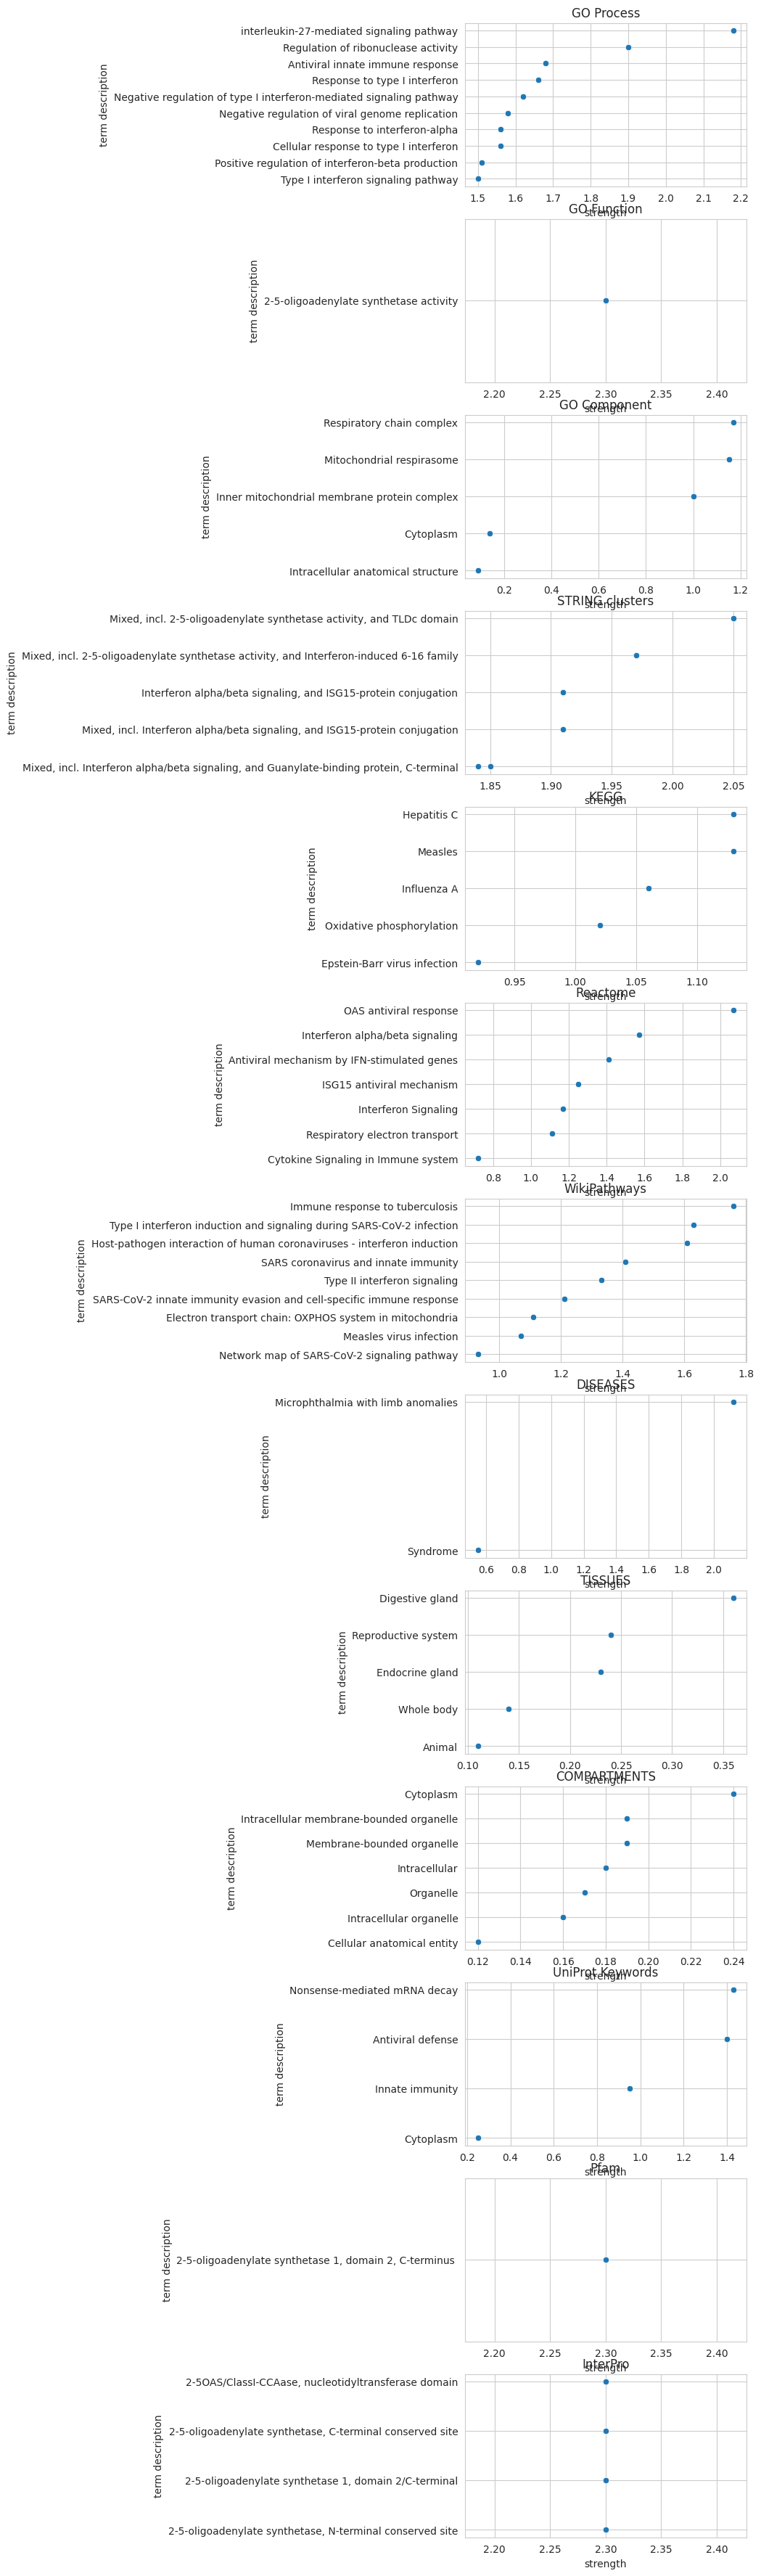

In [31]:
# 4114B_4114K
df = pd.read_csv('/home/nkondratyuk/homework/hw_2.3/enrichment_4114B_4114K_genes.all.tsv', sep = '\t')
cats = df['#category'].unique()
f, ax = plt.subplots(len(cats), 1, figsize = (5, 45))
i = 0
for c in cats:
    tmp = df[df['#category'] == c]
    tmp = tmp.sort_values(by = 'strength', ascending = False)
    sns.scatterplot(x = 'strength', y = 'term description', data = tmp.head(10), ax = ax[i])
    ax[i].set_title(c)
    i+=1

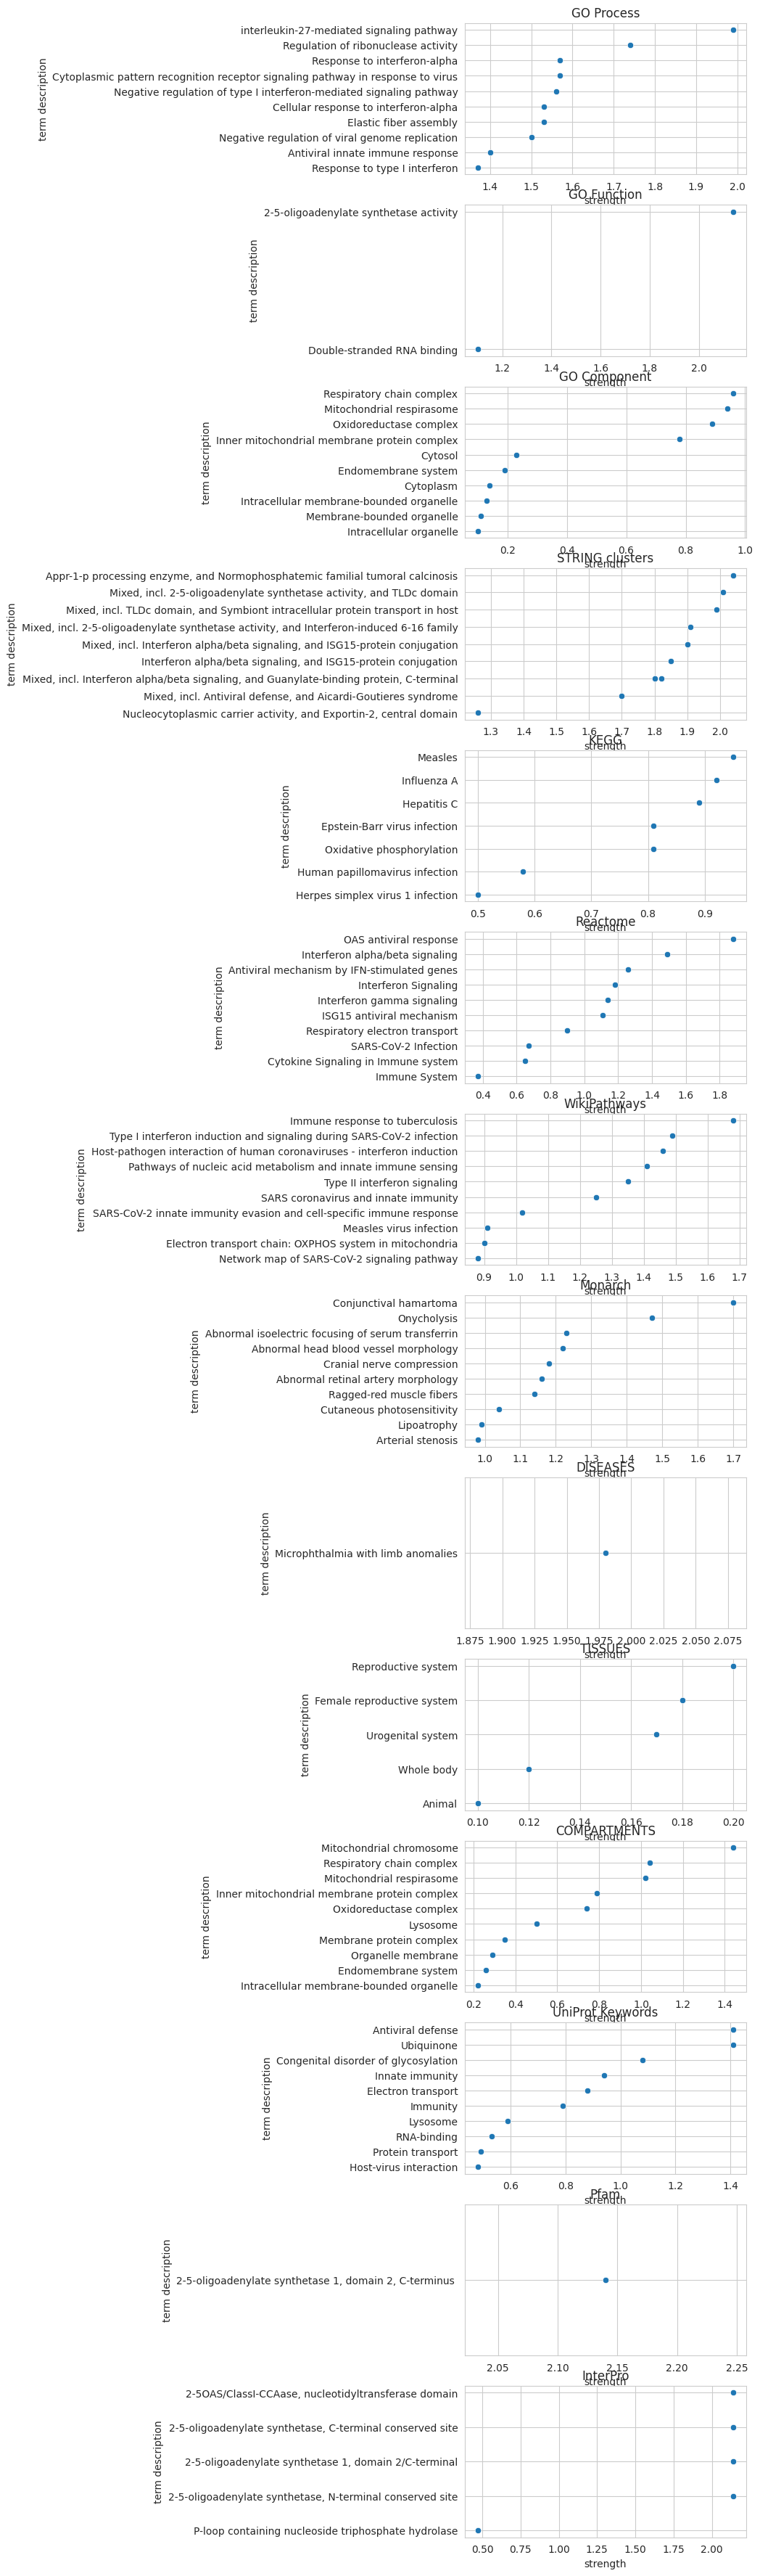

In [32]:
# 4114A_4114K
df = pd.read_csv('/home/nkondratyuk/homework/hw_2.3/enrichment_4114A_4114K_genes.all.tsv', sep = '\t')
cats = df['#category'].unique()
f, ax = plt.subplots(len(cats), 1, figsize = (5, 45))
i = 0
for c in cats:
    tmp = df[df['#category'] == c]
    tmp = tmp.sort_values(by = 'strength', ascending = False)
    sns.scatterplot(x = 'strength', y = 'term description', data = tmp.head(10), ax = ax[i])
    ax[i].set_title(c)
    i+=1

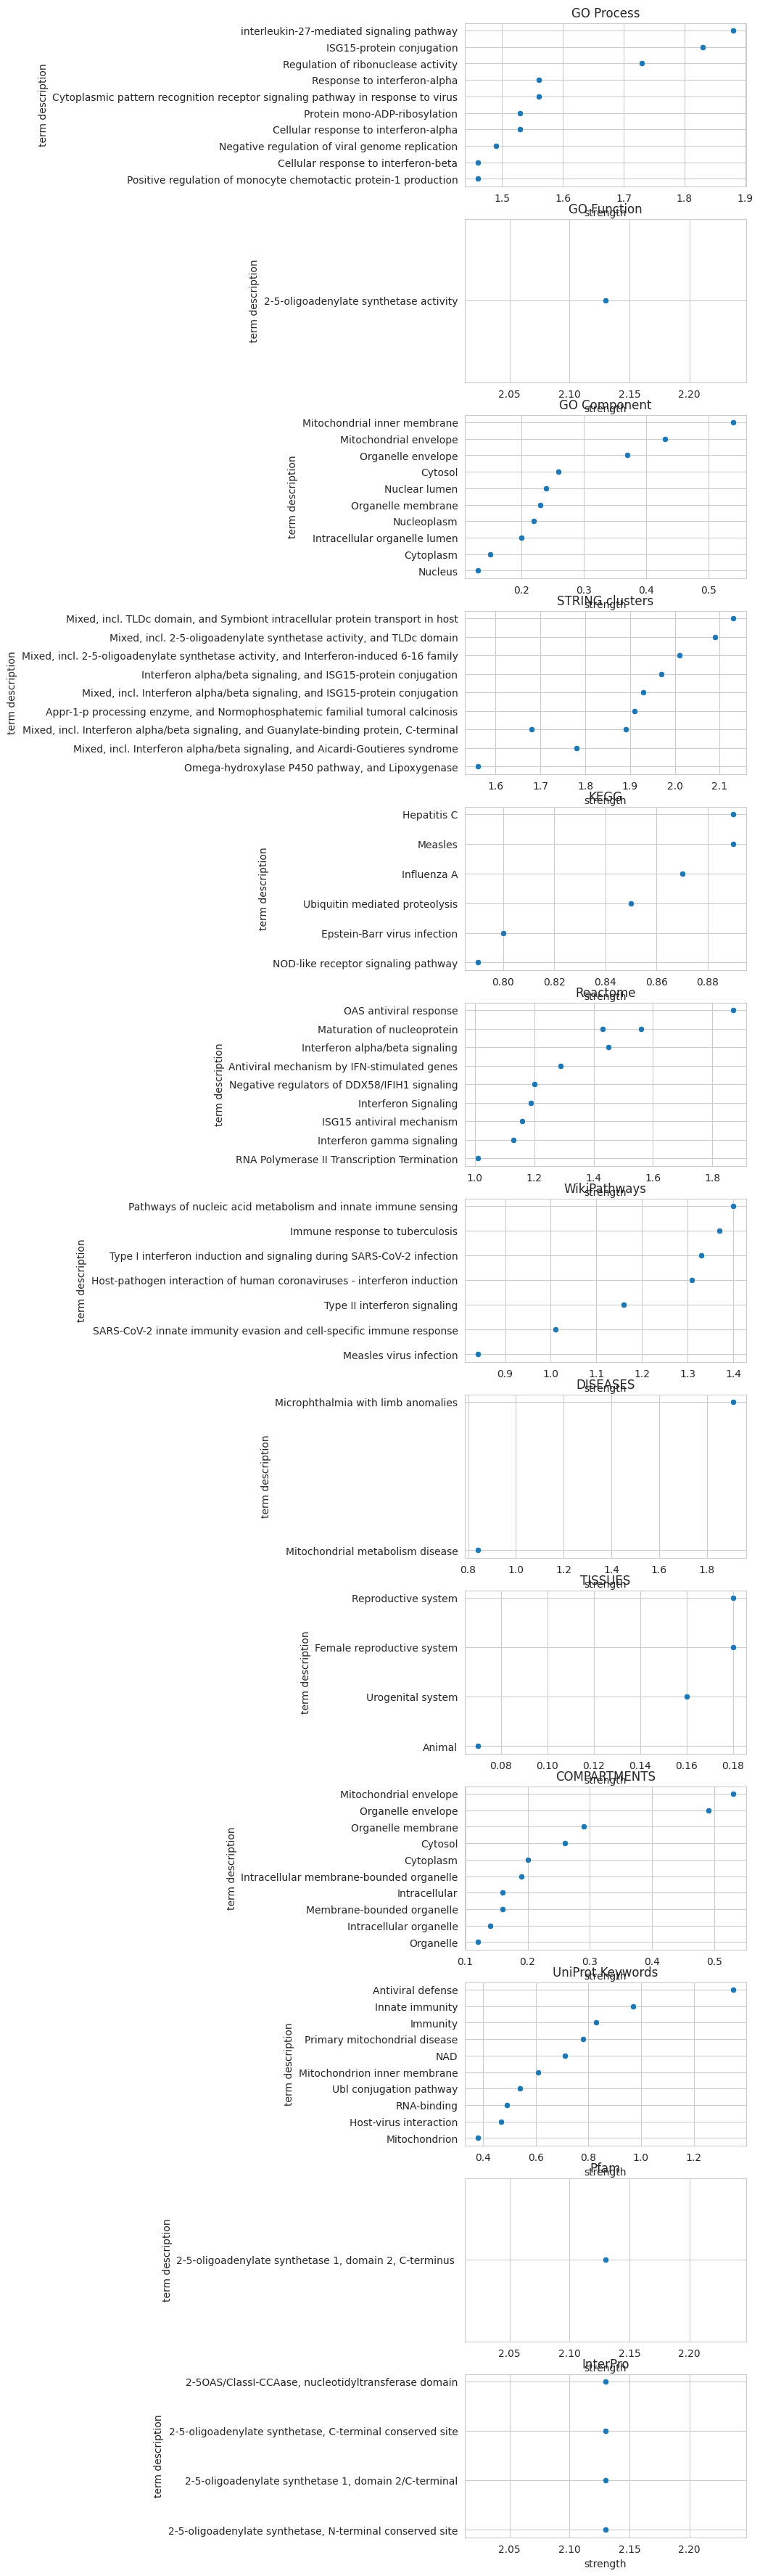

In [37]:
# 6138B_6138K
df = pd.read_csv('/home/nkondratyuk/homework/hw_2.3/enrichment_6138B_6138K_genes.all.tsv', sep = '\t')
cats = df['#category'].unique()
f, ax = plt.subplots(len(cats), 1, figsize = (5, 45))
i = 0
for c in cats:
    tmp = df[df['#category'] == c]
    tmp = tmp.sort_values(by = 'strength', ascending = False)
    sns.scatterplot(x = 'strength', y = 'term description', data = tmp.head(10), ax = ax[i])
    ax[i].set_title(c)
    i+=1

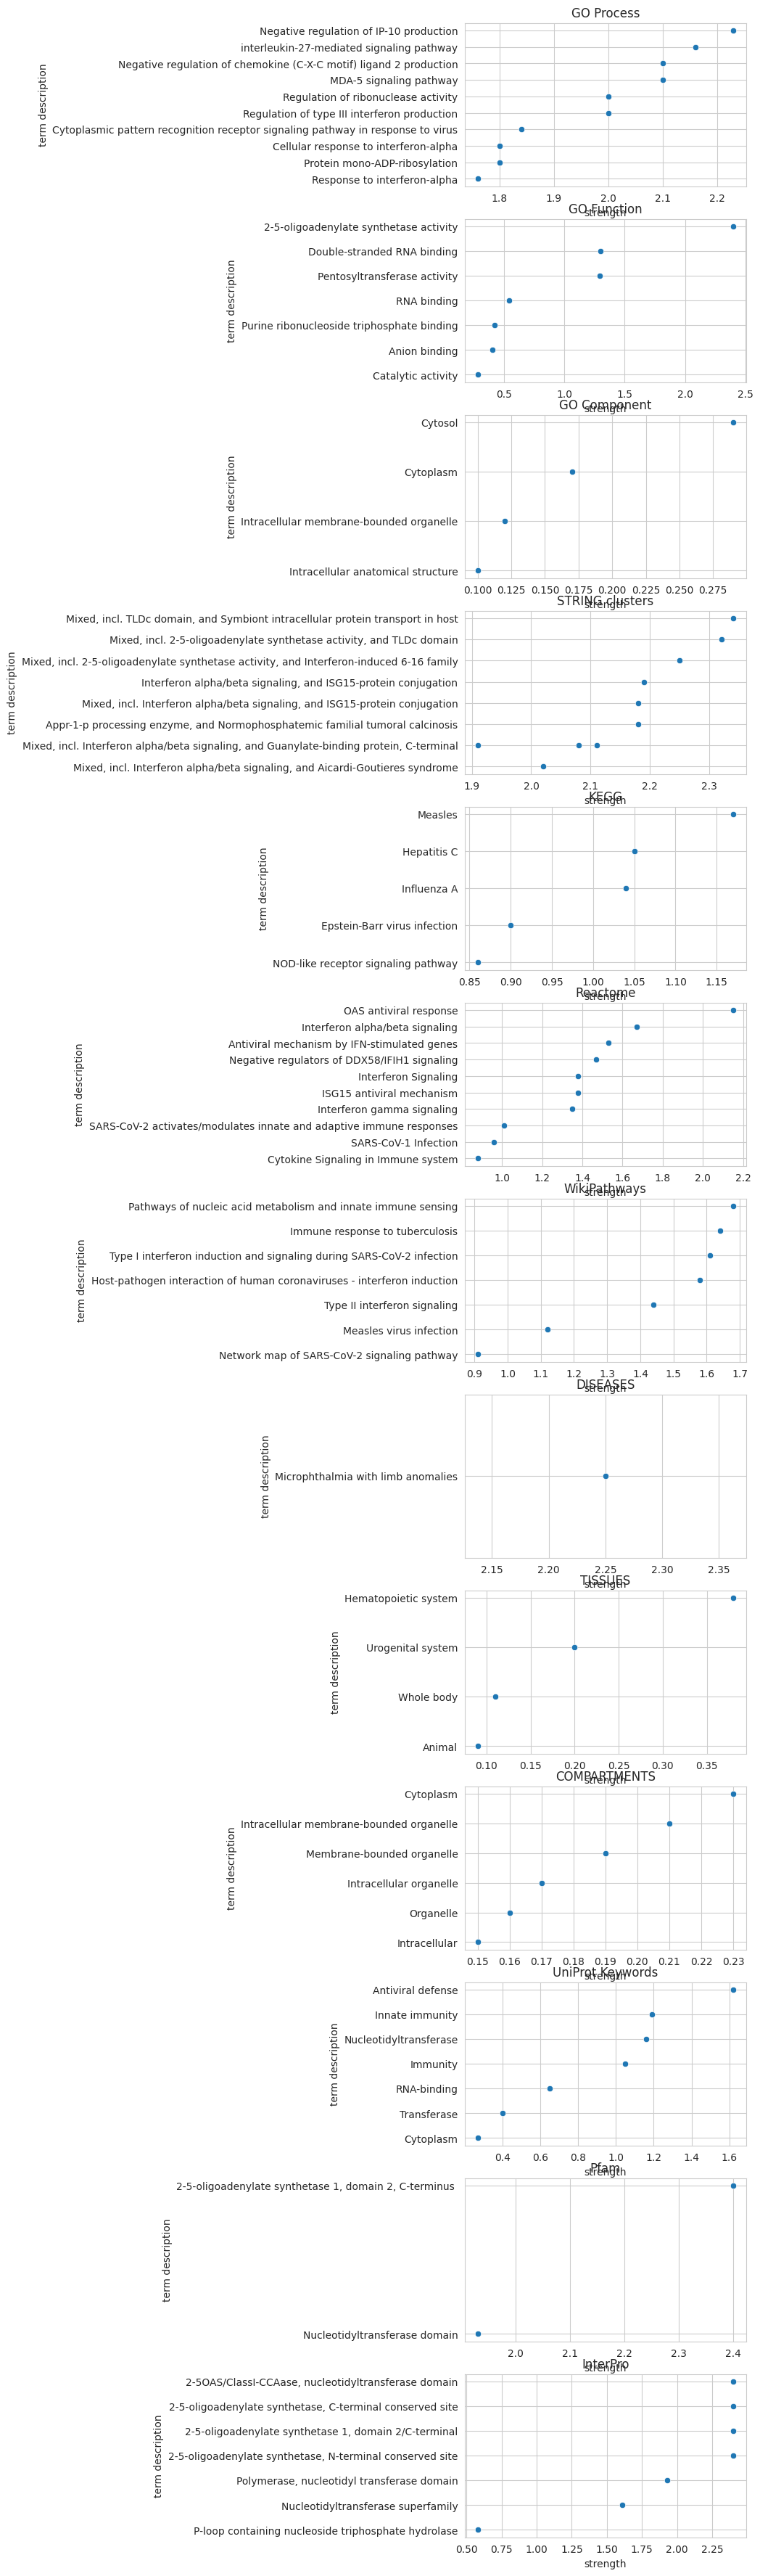

In [38]:
# 6138A_6138K
df = pd.read_csv('/home/nkondratyuk/homework/hw_2.3/enrichment_6138A_6138K_genes.all.tsv', sep = '\t')
cats = df['#category'].unique()
f, ax = plt.subplots(len(cats), 1, figsize = (5, 45))
i = 0
for c in cats:
    tmp = df[df['#category'] == c]
    tmp = tmp.sort_values(by = 'strength', ascending = False)
    sns.scatterplot(x = 'strength', y = 'term description', data = tmp.head(10), ax = ax[i])
    ax[i].set_title(c)
    i+=1

# Выводы
### 3821A_3821K
- видно сильное обогащение в IFN-связанных путях
- высокие значения strength для иммунных процессов, противовирусных ответов

### 3821B_3821K
- тут даже не вывелся GO Process, так что возможно отсутствие статистически значимого обогащения, значит в нашем случае ответ только на IFNα
- однако согласно статье эта линия позитивный контроль и для IFNβ, а учитывая, что для этой линии я брала данные с сервера, то возможно в них проблемы

### 4114B_4114K
- так же видно сильное обогащение в IFN-связанных путях и высокие значения strength для иммунных процессов, противовирусных ответов

### 4114A_4114K
- тут так же присутствует обогащение в IFN-связанных путях, в том числе конкретно с IFNα, однако в статье говорится *while the IFN𝛽-treated GBM2017b cohort and
IFN𝛼-treated primary GBM4114 cells represented the negative controls (Table S3)* что странно

### 6138B_6138K
- про эту линии в статье не было информации, так что можно предположить, что ответ правда присутствует, причём в отличие от других линий здесь уже нет негативного контроля интерферона I типа

### 6138A_6138K
- а в случае IFNα кроме присутствия ответа на него есть ещё регуляция интерферона III типа 


В ходе этой работы был выполнен полный пайплайн обработки протеомных данных: начиная с конвертации сырых масс-спектрометрических файлов (.raw) в формат mzML с помощью MSConvert, затем идентификация белков с использованием MSFragger, последующий анализ дифференциальной экспрессии в scavager, и завершающий этап - функциональный анализ обогащения Gene Ontology, который выявил специфические биологические процессы и молекулярные функции, активированные в ответ на лечение интерфероном в разных линиях глиобластомы.